# Document-Level Sentiment Analysis
This notebook shows the sentiment analysis at the document level using Vader and TextBlob

In [9]:
%matplotlib inline

# Data manipulation 
import pandas as pd
import numpy as np

# Data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 16})

In [10]:
# import custom class
%run -i '../scripts/_text_analysis.py'

In [11]:
# instantiate the class
model = TextAnalytics()

## Load data

In [4]:
df = pd.read_csv('../data/all_data.csv')
print('Data size = {}'.format(df.shape))
df.head()

Data size = (25708, 3)


,reviews,rating,company
0,Great card! We get cash back for our grocery a...,4.0,American Express Blue Cash Preferred
1,While traveling we had to keep calling the Cre...,1.0,Credit One Bank
2,Great card to have! Love all the additional cr...,5.0,Capital One Quicksilver Rewards
3,no tengo tanta experiencia asi que no puedo da...,2.0,Citi Double Cash Card
4,This is a basic credit card. The cash back dea...,4.0,Bank of America Cash Rewards Credit Card


In [5]:
# Missing values
df.isnull().sum()

reviews    0
rating     0
company    0
dtype: int64

In [5]:
# Count of total reviews to each credit card
review_count = df.groupby('company')['reviews'].count().sort_values(ascending = False)
review_count.head()

company
Bank of America Cash Rewards Credit Card    2476
Capital One Quicksilver Rewards             2292
Capital One Venture Rewards                 2204
Capital One Platinum                        2103
Credit One Bank                             2016
Name: reviews, dtype: int64

In [6]:
len(review_count)

40

In [7]:
# Data Pre-processing
df = model.pre_process_text(df, 'reviews')

## Sentiment analysis with Vader & Textblob

In [12]:
df['vader_sentiment'] = df.reviews.apply(model.vader_polarity_scores)
df['blob_sentiment'] = df.reviews.apply(model.blob_polarity_scores)
df.head()

,reviews,rating,company,vader_sentiment,blob_sentiment
0,great card! we get cash back for our grocery a...,4.0,American Express Blue Cash Preferred,0.7455,0.2645
1,while traveling we had to keep calling the cre...,1.0,Credit One Bank,0.2335,-0.0875
2,great card to have! love all the additional cr...,5.0,Capital One Quicksilver Rewards,0.9097,0.8125
3,no tengo tanta experiencia asi que no puedo da...,2.0,Citi Double Cash Card,-0.5267,0.0000
4,this is a basic credit card the cash back dea...,4.0,Bank of America Cash Rewards Credit Card,0.7269,0.2600


## Plots

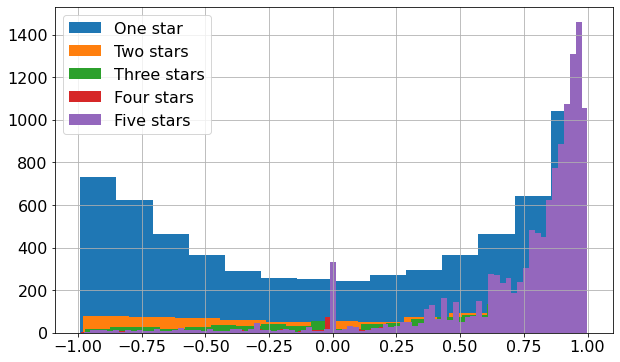

In [13]:
# Plot of Vader analysis
df[df.rating == 1].vader_sentiment.hist(bins = 'auto',figsize=(10,6), label = 'One star')
df[df.rating == 2].vader_sentiment.hist(bins = 'auto',label = 'Two stars')
df[df.rating == 3].vader_sentiment.hist(bins = 'auto',label = 'Three stars')
df[df.rating == 4].vader_sentiment.hist(bins = 'auto',label = 'Four stars')
df[df.rating == 5].vader_sentiment.hist(bins = 'auto',label = 'Five stars')
plt.legend(loc = 'best')
plt.show()

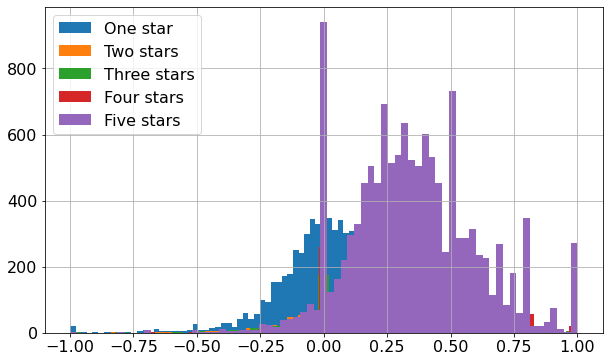

In [14]:
# Plot of Textblob analysis
df[df.rating == 1].blob_sentiment.hist(bins = 'auto',figsize=(10,6), label = 'One star')
df[df.rating == 2].blob_sentiment.hist(bins = 'auto',figsize=(10,6),label = 'Two stars')
df[df.rating == 3].blob_sentiment.hist(bins = 'auto',figsize=(10,6),label = 'Three stars')
df[df.rating == 4].blob_sentiment.hist(bins = 'auto',figsize=(10,6),label = 'Four stars')
df[df.rating == 5].blob_sentiment.hist(bins = 'auto',figsize=(10,6),label = 'Five stars')
plt.legend(loc = 'upper left')
plt.show()

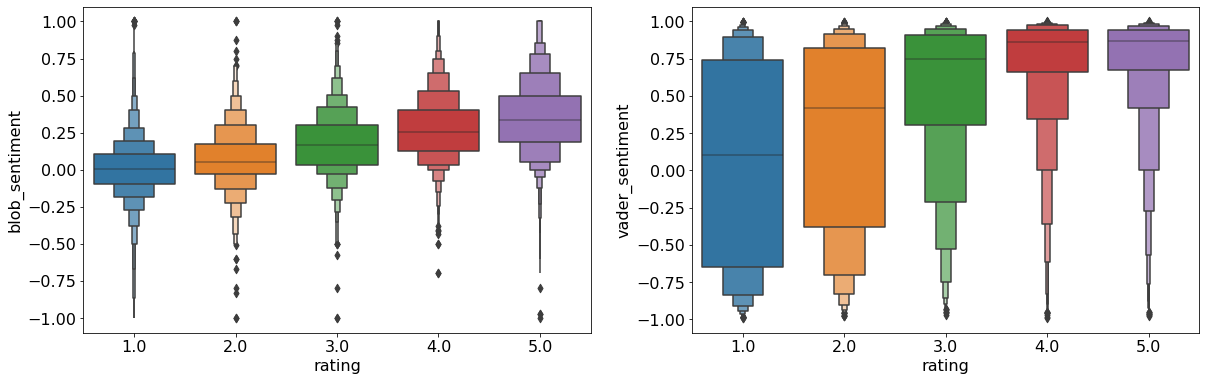

In [15]:
gridsize = (1, 2)
fig = plt.figure(figsize=(20, 6))
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (0, 1))
sns.boxenplot(x = 'rating', y = 'blob_sentiment', data = df, ax = ax1)
sns.boxenplot(x = 'rating', y = 'vader_sentiment', data = df, ax = ax2)
plt.show()

## The most negative polarity with 4 or 5 star rating (VADER)

In [16]:
df[(df.rating >= 4) & (df.vader_sentiment == -1)][['reviews', 'rating', 'vader_sentiment']]

,reviews,rating,vader_sentiment


## The most positive polarity with 1 star rating (VADER)

In [17]:
df[(df.rating == 1) & (df.vader_sentiment == 1)][['reviews', 'rating', 'vader_sentiment']]

,reviews,rating,vader_sentiment


## Mean sentiment for each credit card (VADER)

In [18]:
df.groupby('company')['vader_sentiment'].mean().sort_values(ascending = False).round(2)

company
Chase Freedom Unlimited                               0.92
Chase Sapphire Preffered Card                         0.84
Capital One Secured Credit Card                       0.84
Bank of America Cash Rewards Credit Card              0.76
Citi Double Cash Card                                 0.75
Discover it Secured                                   0.73
American Express Business Gold Rewards Credit Card    0.72
Bank of America Travel Rewards Credit Card            0.72
American Express Blue Cash Preferred                  0.71
TD Cash Visa Credit Card                              0.70
Discover it Cash Back                                 0.69
Capital One Venture Rewards                           0.68
Citi Diamond Preferred Card                           0.67
Capital One Quicksilver Rewards                       0.67
Discover it Miles                                     0.67
Citi Simplicity Card                                  0.66
Capital One Platinum                            